In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
%matplotlib inline

In [3]:
con_comp = pd.read_csv("complaints_dec_2014.csv")
con_comp.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [4]:
con_comp['Complaint ID'].head()

0    1177167
1    1177166
2    1177165
3    1177164
4    1177163
Name: Complaint ID, dtype: int64

In [5]:
complaint_id = con_comp.pop('Complaint ID')
con_comp.index = complaint_id

In [6]:
con_comp[con_comp.index == 1177167]

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,
1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN


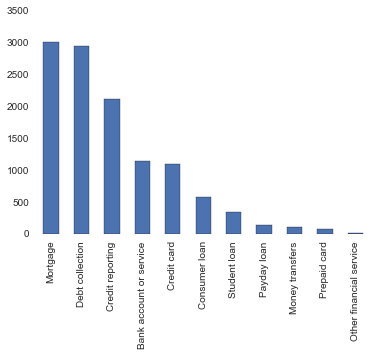

In [7]:
con_comp['Product'].value_counts().plot(kind="bar")

#Industry Complained about

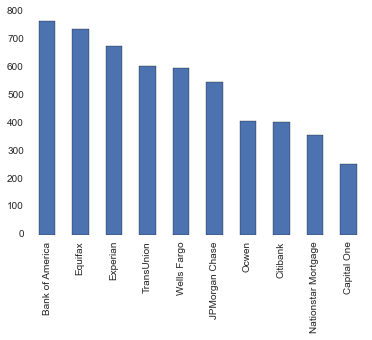

In [8]:
con_comp['Company'].value_counts()[0:10].plot(kind="bar")

#Top 10 Companies to Complain about

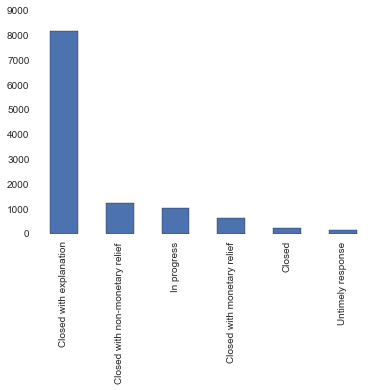

In [9]:
con_comp['Company response'].value_counts().plot(kind="bar")

##This is the company response

Tuesday      2580
Monday       2544
Wednesday    2289
Thursday     1634
Friday       1446
Saturday      543
Sunday        507
dtype: int64


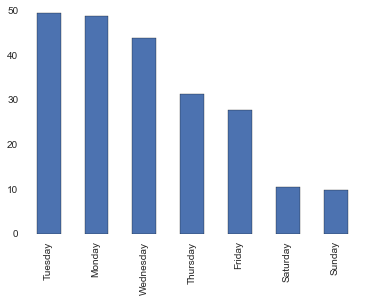

In [15]:
def to_weekdays(day):
    day_num = day.isoweekday()
    if day_num == 1:
        return "Monday"
    if day_num == 2:
        return "Tuesday"
    if day_num == 3:
        return "Wednesday"
    if day_num == 4:
        return "Thursday"
    if day_num == 5:
        return "Friday"
    if day_num == 6:
        return "Saturday"
    if day_num == 7:
        return "Sunday"

def to_avg(day):
    return day/52

    
date_rec = con_comp.pop('Date received')
con_comp['Date received'] = pd.to_datetime(date_rec)

week = con_comp['Date received'].apply(to_weekdays)
con_comp['Weekday'] = week
print(con_comp['Weekday'].value_counts())
weekavg = con_comp['Weekday'].value_counts() / 52
weekavg.plot(kind="bar")
#con_comp["Weekdayavg"] = weekavg

#This is the average complaint per day of the week